In [4]:
import os
import scipy
import shutil
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import plotly.express as px
import geopandas as gpd

import imageio
import os
import io
import requests

import datetime as dt
from dateutil.relativedelta import *

import netCDF4
from netCDF4 import Dataset, num2date

import cmocean

import seaborn as sns
import pymannkendall as mk

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = (12,7)
%matplotlib inline

from PIL import Image  # To create gifs
# from Mapfct import *     # Here is where we call the function.
# from Crossfct import *   # Here is where we call the function.


In [5]:
month = 3
year = 2017
netCDF_datestr = str(year)+'-'+format(month, '02')

# GBR4 BIO
biofiles = ["https://thredds.ereefs.aims.gov.au/thredds/dodsC/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily.nc"]

ds_bio = xr.open_mfdataset(biofiles)
ds_bio

<xarray.Dataset>
Dimensions:          (k: 17, latitude: 723, longitude: 491, time: 3073)
Coordinates:
    zc               (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * latitude         (latitude) float64 -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude        (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
  * time             (time) datetime64[ns] 2010-12-01T02:00:00 ... 2019-04-30...
Dimensions without coordinates: k
Data variables: (12/108)
    TOTAL_NITROGEN   (time, k, latitude, longitude) float32 dask.array<chunksize=(3073, 17, 723, 491), meta=np.ndarray>
    alk              (time, k, latitude, longitude) float32 dask.array<chunksize=(3073, 17, 723, 491), meta=np.ndarray>
    BOD              (time, k, latitude, longitude) float32 dask.array<chunksize=(3073, 17, 723, 491), meta=np.ndarray>
    Chl_a_sum        (time, k, latitude, longitude) float32 dask.array<chunksize=(3073, 17, 723, 491), meta=np.ndarray>
    CO32             (time, k, latitude, longitude) float32 dask.array<chunksize=(3073, 17, 723, 491), meta=np.ndarray>
    DetBL_N          (time, k, latitude, longitude) float32 dask.array<chunksize=(3073, 17, 723, 491), meta=np.ndarray>
    ...               ...
    SGH_N            (time, latitude, longitude) float32 dask.array<chunksize=(3073, 723, 491), meta=np.ndarray>
    SGH_N_pr         (time, latitude, longitude) float32 dask.array<chunksize=(3073, 723, 491), meta=np.ndarray>
    SGHROOT_N        (time, latitude, longitude) float32 dask.array<chunksize=(3073, 723, 491), meta=np.ndarray>
    SGROOT_N         (time, latitude, longitude) float32 dask.array<chunksize=(3073, 723, 491), meta=np.ndarray>
    TSSM             (time, latitude, longitude) float32 dask.array<chunksize=(3073, 723, 491), meta=np.ndarray>
    Zenith2D         (time, latitude, longitude) float32 dask.array<chunksize=(3073, 723, 491), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                   CF-1.0
    NCO:                           netCDF Operators version 4.7.7 (Homepage =...
    RunID:                         2
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:    2021-09-07T22:58:30+10:00
    aims_ncaggregate_datasetId:    products__ncaggregate__ereefs__GBR4_H2p0_B...
    ...                            ...
    metadata_link:                 https://eatlas.org.au/data/uuid/61f3a6df-2...
    paramfile:                     /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_Cb/...
    paramhead:                     eReefs 4 km grid. SOURCE Catchments with 2...
    technical_guide_link:          https://eatlas.org.au/pydio/public/aims-er...
    technical_guide_publish_date:  2020-08-18
    title:                         eReefs AIMS-CSIRO GBR4 BioGeoChemical 3.1 ...

In [7]:
# Define the time range
start_date = '2017-03-20'
end_date = '2017-03-30'

# # Slice the dataset based on the time range
ds_bio_slice = ds_bio.sel(time=slice(start_date, end_date), k=-1)
ds_bio_slice

<xarray.Dataset>
Dimensions:          (latitude: 723, longitude: 491, time: 11)
Coordinates:
    zc               float64 dask.array<chunksize=(), meta=np.ndarray>
  * latitude         (latitude) float64 -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude        (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
  * time             (time) datetime64[ns] 2017-03-20T02:00:00 ... 2017-03-30...
Data variables: (12/108)
    TOTAL_NITROGEN   (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
    alk              (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
    BOD              (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
    Chl_a_sum        (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
    CO32             (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
    DetBL_N          (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
    ...               ...
    SGH_N            (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
    SGH_N_pr         (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
    SGHROOT_N        (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
    SGROOT_N         (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
    TSSM             (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
    Zenith2D         (time, latitude, longitude) float32 dask.array<chunksize=(11, 723, 491), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                   CF-1.0
    NCO:                           netCDF Operators version 4.7.7 (Homepage =...
    RunID:                         2
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:    2021-09-07T22:58:30+10:00
    aims_ncaggregate_datasetId:    products__ncaggregate__ereefs__GBR4_H2p0_B...
    ...                            ...
    metadata_link:                 https://eatlas.org.au/data/uuid/61f3a6df-2...
    paramfile:                     /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_Cb/...
    paramhead:                     eReefs 4 km grid. SOURCE Catchments with 2...
    technical_guide_link:          https://eatlas.org.au/pydio/public/aims-er...
    technical_guide_publish_date:  2020-08-18
    title:                         eReefs AIMS-CSIRO GBR4 BioGeoChemical 3.1 ...

In [12]:
# creating secchi datase (=the measurement of light penetration through the water. Lower = higher turbidity)
sech = ds_bio['Secchi']
sech

<xarray.DataArray 'Secchi' (time: 3073, latitude: 723, longitude: 491)>
dask.array<open_dataset-Secchi, shape=(3073, 723, 491), dtype=float32, chunksize=(3073, 723, 491), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude  (longitude) float64 142.2 142.2 142.2 142.3 ... 156.8 156.8 156.9
  * time       (time) datetime64[ns] 2010-12-01T02:00:00 ... 2019-04-30T02:00:00
Attributes:
    short_name:   Secchi
    units:        m
    long_name:    Secchi from 488 nm
    _ChunkSizes:  [  1 133 491]

In [20]:
# Calculate the daily average for secchi values  
daily_mean_secchi = ds_bio_slice.Secchi.resample(time='1D').mean()
daily_mean_secchi

<xarray.DataArray 'Secchi' (time: 11, latitude: 723, longitude: 491)>
dask.array<stack, shape=(11, 723, 491), dtype=float32, chunksize=(1, 723, 491), chunktype=numpy.ndarray>
Coordinates:
    zc         float64 dask.array<chunksize=(), meta=np.ndarray>
  * latitude   (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude  (longitude) float64 142.2 142.2 142.2 142.3 ... 156.8 156.8 156.9
  * time       (time) datetime64[ns] 2017-03-20 2017-03-21 ... 2017-03-30
Attributes:
    short_name:   Secchi
    units:        m
    long_name:    Secchi from 488 nm
    _ChunkSizes:  [  1 133 491]

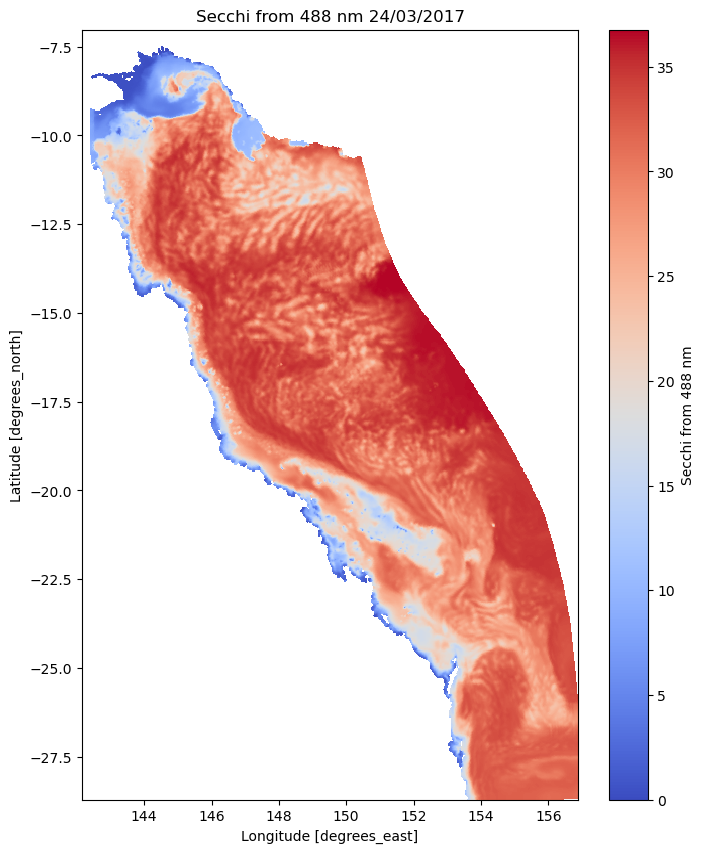

In [22]:
# plotting daily mean chl_a
daily_mean_secchi.sel(time='2017-03-24').plot(cmap='coolwarm', figsize=(8,10),cbar_kwargs={'label': 'Daily Mean Secchi from 488 nm'})

# Set title
plt.title('Secchi from 488 nm 24/03/2017')
plt.show()

In [16]:
# Determine global vmin and vmax for the entire time range
vmin = daily_mean_secchi.min().compute()
vmax = daily_mean_secchi.max().compute()

# Directory to save individual frames
output_dir = 'sech_frames'
os.makedirs(output_dir, exist_ok=True)

# List to store file paths for GIF creation
image_files = []

# Loop through each day in the selected time range
for time in daily_mean_secchi.time:
    # Generate the plot
    plt.figure(figsize=(8, 10))
    chl_a.sel(time=time).plot(cmap='coolwarm', vmin=vmin, vmax=vmax, cbar_kwargs={'label': 'Daily Mean Secchi from 488 nm'})
    plt.title(f'Daily Mean Secchi from 488 nm {str(time.values)[:10]}')
    
    # Save the plot as an image file
    file_path = os.path.join(output_dir, f"daily_mean_secchi_{str(time.values)[:10]}.png")
    plt.savefig(file_path)
    plt.close()
    
    # Add the file path to the list
    image_files.append(file_path)

# Create a GIF from the images
with imageio.get_writer('sech_animation.gif', mode='I', duration=0.5, loop=0) as writer:
    for file_path in image_files:
        image = imageio.imread(file_path)
        writer.append_data(image)

# Clean up by removing the individual frames if desired
for file_path in image_files:
    os.remove(file_path)

print("GIF created successfully!")

syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: Request^ Too Large: 4363.573956 Mbytes, max=500.0
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: Request^ Too Large: 4363.573956 Mbytes, max=500.0
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: Request^ Too Large: 4363.573956 Mbytes, max=500.0
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: Request^ Too Large: 4363.573956 Mbytes, max=500.0
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: Request^ Too Large: 4363.573956 Mbytes, max=500.0
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: Request^ Too Large: 4363.573956 Mbytes, max=500.0
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: Request^ Too Large: 4363.573956 Mby

RuntimeError: NetCDF: Authorization failure

In [ ]:
# # Directory to save individual frames
# output_dir = 'chl_a_frames'
# os.makedirs(output_dir, exist_ok=True)

# # List to store file paths for GIF creation
# image_files = []

# # Loop through each day in the selected time range
# for time in chl_a.time:
#     # Generate the plot
#     plt.figure(figsize=(8, 10))
#     chl_a.sel(time=time).plot(cmap='coolwarm', cbar_kwargs={'label': 'Chlorophyll-a (mg Chl m-3)'})
#     plt.title(f'Daily Mean Chlorophyll-a {str(time.values)[:10]}')
    
#     # Save the plot as an image file
#     file_path = os.path.join(output_dir, f"chl_a_{str(time.values)[:10]}.png")
#     plt.savefig(file_path)
#     plt.close()
    
#     # Add the file path to the list
#     image_files.append(file_path)

# # Create a GIF from the images
# with imageio.get_writer('chl_a_animation.gif', mode='I', duration=0.5) as writer:
#     for file_path in image_files:
#         image = imageio.imread(file_path)
#         writer.append_data(image)

# # Clean up by removing the individual frames if desired
# for file_path in image_files:
#     os.remove(file_path)

# print("GIF created successfully!")

In [28]:
# fig,ax = plt.subplots(ncols=2, nrows=4, figsize=(14,14))
# daily_mean_temp.sel(time='2017-03-24T00:00:00.000000000',k=-1).plot(ax=ax[0,0])
# daily_mean_temp.sel(time='2017-03-25T00:00:00.000000000',k=-1).plot(ax=ax[0,1])
# daily_mean_temp.sel(time='2017-03-26T00:00:00.000000000',k=-1).plot(ax=ax[1,0])
# daily_mean_temp.sel(time='2017-03-27T00:00:00.000000000',k=-1).plot(ax=ax[1,1])
# daily_mean_temp.sel(time='2017-03-28T00:00:00.000000000',k=-1).plot(ax=ax[2,0])
# daily_mean_temp.sel(time='2017-03-29T00:00:00.000000000',k=-1).plot(ax=ax[2,1])
# daily_mean_temp.sel(time='2017-03-30T00:00:00.000000000',k=-1).plot(ax=ax[3,1])